# Learners in Finance: OLS Through to Neural Nets

In the previous notebook we spent a lot of time preparing the data for machine learning. In this notebook we will look at fitting a number of machine learning models to the data and discuss briefly how the algorithms work. Let us begin.

We will start with ordinary least squares regression (OLS), look at why summary stats and residuals are important to examine, go into regularisation, ELasticNets,RandomForests and end on neural nets.

We will touch on a number of topics ...

1) OLS Regression: fitting, violations, summary stats

2) Regulatisation

3) BRandom forests

4) XAI: Explainability: LIME, SHAP

5) Artificial Neural Nets: A quick look....




In [1]:
#Data srtuctures and core functionality....
import pandas as pd
import numpy as np

#data viz...
import matplotlib.pyplot as plt
import seaborn as sns

#Core ML library...
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Now we load the data and separate the independent and dependent variables.

In [2]:
df = pd.read_csv('X.csv')
y = df['AVERAGE RETURN'] # independent variable 

# Drop the non-numeric columns from the dependent variables
X = df.drop(
    ["NAME",
    "TICKER",
    "SECTOR",
    "COUNTRY",
    "YEAR",
    "AVERAGE RETURN"],
axis=1)

Now we split the data into a training and test set. We assign an integer value to the ```random_state``` parameter in the ```train_test_split``` function to ensure we get the same split every time in our data.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

# 1) Linear Regression
Ordinary least squares regression (OLS), and elastic nets can be classified as types of linear regression models. In this section, we discuss what a linear regression model is and how OLS and elastic nets differ. Let us suppose we have a matrix $\mathbf{X}$ where each row represents a sample and each column represents a feature in the data. So for example

$$
\mathbf{X}
=
\begin{bmatrix}
    \mathbf{x}_1 \\
    \mathbf{x}_2 \\
    \vdots \\
    \mathbf{x}_n
\end{bmatrix}
=
\begin{bmatrix}
    x_{11} & x_{12} & \dots & x_{1m} \\ 
    x_{21} & x_{22} & \dots & x_{2m} \\
    \vdots & \vdots & \dots & \vdots \\
    x_{n1} & x_{n2} & \dots & x_{nm} 
\end{bmatrix}.
$$

In this case there are $n$ samples $\mathbf{x_1}, \mathbf{x_2}, \dots, \mathbf{x_n}$ and each sample has $m$ features. Let us also suppose we have some vector $\mathbf{y}$ that represents the independent variable of the data so we have 

$$
\mathbf{y} = 
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}.
$$

Here $y_i$ represents the target of our predictions for sample $\mathbf{x}_i$. A linear regression model takes some sample $\mathbf{x}_i$ and makes some prediction $\hat{y}_i$ of the target $y_i$. The general form a linear regression model is as follows

$$
    \hat{y}_i = w_0 + w_1 x_{i1} + w_2 x_{i2} + \dots + w_m x_{im},
$$

The coefficients $w_0, w_1, \dots, w_n$ are parameters that are learned during training to ensure that $\hat{y}_i$ is a good prediction of $y_i$. We can shorten the notation by letting 

$$
 \mathbf{w} = 
 \begin{bmatrix}
    w_0 \\
    w_1 \\
    \vdots \\
    w_m
\end{bmatrix},
$$

and 

$$
\mathbf{\bar{x}}_i = 
\begin{bmatrix}
    1 & x_{1i} & x_{2i} & \dots & x_{mi}
\end{bmatrix}.
$$

So, in matirx form, we now have

$$
\begin{bmatrix}
    \hat{y}_1 \\
    \hat{y}_2 \\
    \vdots \\
    \hat{y}_n
\end{bmatrix}
=
\begin{bmatrix}
    \mathbf{\bar{x}}_1 \\
    \mathbf{\bar{x}}_2 \\
    \vdots \\
    \mathbf{\bar{x}}_n
\end{bmatrix}
\cdot
\begin{bmatrix}
    w_0 \\
    w_1 \\
    \vdots \\
    w_m
\end{bmatrix}
=
\mathbf{\bar{X}} \mathbf{w}
$$

OLS and elastic nets are two different approaches to learning the parameters $\mathbf{w}$. Let us start by discussing OLS.

## Ordinary least squares regression (OLS)

In OLS the goal is for the model to fit the data perfectly. In other words we want to find $\mathbf{w}$ such that

$$
    \mathbf{y} = \mathbf{\bar{X}} \mathbf{w}.
$$

With a little matrix algebra we get

$$
\begin{align}
    \mathbf{y} & = \mathbf{\bar{X}} \mathbf{w}, \\
    \mathbf{\bar{X}}^T \mathbf{y} & = (\mathbf{\bar{X}}^T \mathbf{\bar{X}}) \mathbf{w}, \\
    ( \mathbf{\bar{X}}^T \mathbf{\bar{X}} )^{-1} \mathbf{\bar{X}}^T \mathbf{\hat{y}} & = ( \mathbf{\bar{X}}^T \mathbf{\bar{X}} )^{-1} (\mathbf{\bar{X}}^T \mathbf{\bar{X}}) \mathbf{w}, \\
    ( \mathbf{\bar{X}}^T \mathbf{\bar{X}} )^{-1} \mathbf{\bar{X}}^T \mathbf{\hat{y}} & = \mathbf{w}.
\end{align}
$$

Here we have found an algebraic solution for $\mathbf{w}$. This is by no means the whole story but it is enough to demonstrate the OLS is not an iterative method. The rest of the models that we will see are iterative in some way.

## Financial Data and statistical Violations of Linear models
- While machine learning offer the opportunity to model non-linear relationships, we would be very foolish to un-remember the lessons of 40+ years of Econcomics and stats research. 
- For a start:  Is the dependent variable normally distributed or (more likely for a return series) non-stationary and therefore non-normal? Do the residuals have constant variance (homoscedasticity)?

First lets test for normality, using the adjusted ADF test, the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity The more negative the test statistic is, the stronger the rejection of the hypothesis.

In [5]:
#Stats...
import statsmodels.tsa.stattools as sm

result = sm.adfuller(y_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -137.894009
p-value: 0.000000


The results indicate that the indepent variable is stationary, which is good news. Now let's see how an OLS regression performs versus a robust linear model (RLM), which can handle outliers and in some setups, heteroskadisticity:

In [6]:
from statsmodels.api import OLS

#Examine in sample model outputs....

#OLS model - risks violating heteroskadasticity assumptions though
ols_model = OLS(y_train,X_train)
res = ols_model.fit()
print(res.summary())

#robust linear model covers this base...
import statsmodels.api as sm
rlm_model = sm.RLM(y_train, X_train, M=sm.robust.norms.HuberT())
rlm_res = rlm_model.fit()
y_hat = rlm_res.predict(X_train)
rlm_res.summary()

                                 OLS Regression Results                                
Dep. Variable:         AVERAGE RETURN   R-squared (uncentered):                   0.263
Model:                            OLS   Adj. R-squared (uncentered):              0.262
Method:                 Least Squares   F-statistic:                              176.2
Date:                Tue, 16 Mar 2021   Prob (F-statistic):                        0.00
Time:                        23:19:40   Log-Likelihood:                         -8768.5
No. Observations:               18769   AIC:                                  1.761e+04
Df Residuals:                   18731   BIC:                                  1.791e+04
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:         AVERAGE RETURN   No. Observations:                18769
Model:                            RLM   Df Residuals:                    18733
Method:                          IRLS   Df Model:                           35
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 16 Mar 2021                                         
Time:                        23:19:41                                         
No. Iterations:                    50                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Beta_DnSide_24m 12 months prior                    -0.2377      0.064     -3.721      0.000      -0.363      -0.113
Beta_DnSide_24m 24 months prior                     0.0498      0.082      0.607      0.544      -0.111       0.211
Beta_DnSide_24m 36 months prior                     0.1801      0.055      3.254      0.001       0.072       0.289
Diag DebtToEquity 12 months prior                  -0.2814      0.213     -1.319      0.187      -0.700       0.137
Diag DebtToEquity 24 months prior                  -0.0350      0.247     -0.142      0.887      -0.519       0.449
Diag DebtToEquity 36 months prior                  -0.7762      0.444     -1.750      0.080      -1.645       0.093
Diag EPS 12 months prior                         -3.59e+11   2.18e+11     -1.649      0.099   -7.86e+11    6.78e+10
Diag EPS 24 months prior                         2.195e+10    6.9e+09      3.180      0.001    8.42e+09    3.55e+10
Diag EPS 36 months prior                         2.106e+08   2.79e+09      0.076      0.940   -5.25e+09    5.67e+09
Diag EPSGrowth3yrAverage_Rothko 12 months prior     0.6835      0.189      3.623      0.000       0.314       1.053
Diag EPSGrowth3yrAverage_Rothko 24 months prior    -0.0507      0.119     -0.426      0.670      -0.284       0.182
Diag EPSGrowth3yrAverage_Rothko 36 months prior     0.0112      0.162      0.069      0.945      -0.307       0.329
Diag FreeCashFlowpershare 12 months prior          -3.4766      9.563     -0.364      0.716     -22.220      15.266
Diag FreeCashFlowpershare 24 months prior          -0.2049      0.566     -0.362      0.717      -1.315       0.905
Diag FreeCashFlowpershare 36 months prior           1.3390     10.745      0.125      0.901     -19.721      22.398
Diag PE 12 months prior                            -0.8830      4.857     -0.182      0.856     -10.403       8.637
Diag PE 24 months prior                             1.4332     10.943      0.131      0.896     -20.015      22.881
Diag PE 36 months prior                             0.0248      3.566      0.007      0.994      -6.964       7.014
Diag ROE 12 months prior                            0.9427      0.333      2.828      0.005       0.289       1.596
Diag ROE 24 months prior                           -1.5989      0.604     -2.646      0.008      -2.783      -0.414
Diag ROE 36 months prior                            1.4663      0.687      2.134      0.033       0.120       2.813
Diag SentimentNews 12 months prior                 -0.0093      0.032     -0.291      0.771      -0.072       0.054
Diag SentimentNews 24 months prior                 -0.0375      0.031     -1.226      0.220      -0.098       0.022
Diag SentimentNews 36 months prior                  0.0234      0.0

Some independent variables register as less important in the RLM than in the OLS model, demonstrating the impact of heteroskedastcity on a naive interpretation.

Eyeballing the residuals is a good way to determine any violations or biases in the training data. We are expecting to see more or less $iid$ residuals. We cant expect this to be perfect but material skews in the distribution would represent a major probl;em with the model:

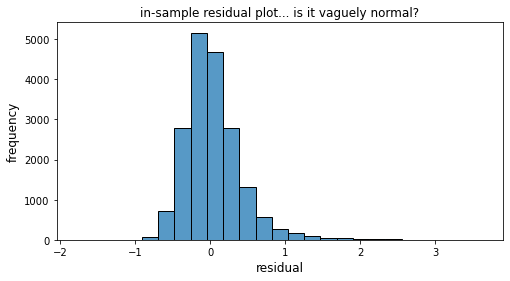

In [7]:
"""
This cell includes both the seaborn and matplotlib histogram plot just to show the difference
"""

#sense check residuals
e_train = y_train - y_hat

fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.histplot(x=e_train, bins=25, ax=ax)

# Add labels
ax.set_title('in-sample residual plot... is it vaguely normal?', fontsize=12)
ax.set_xlabel('residual', fontsize=12)
ax.set_ylabel('frequency', fontsize=12);

In [8]:
from statsmodels.stats.descriptivestats import describe

print("The skew in e_train is %f" % describe(e_train).loc['skew'].values[0])

The skew in e_train is 1.693602


## Linear Models: Conclusions

- Linear models do a reasonable job modelling financial data in general. 
- However the assumptions create problems for use on financial data as we have seen. 
- It is also the case that the more independent variables you throw at a linear regression model the greater the explanatory power will be, and the higher the error is likely to be out of sample. This issue is known as overfit or variance and is addressed by fudges like ***adjusted $R^\mathbf{2}$***. 

This poses key questions for how we construct models:

1) How to select the most powerful indepdent variables? 
2) How to combine these?

This brings us onto the topic of regularisation, or exerting a cost for having non-zero model weights.

# 2) Regularisation 

## L1 and L2 Regularisation 

- Regularisation penalises a model for having non-zero parameters 
- ...and therefore provides a trade off between the reduction in error an increased model complexity
- L1 and L2 are the most common forms of regularisation, improving generalisation of models by reducing overfit. Giving us a better shot at identifying causality....

Regularisation is generally applied in the process of gradient descent, which iteratively adjusts parameters in the model to reduce a loss function. We will use mean squared error (MSE) as our loss function. 

$$
    L = \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2.
$$

Inductive biases in our learning process and quirks in the input distribution can sometimes lead to excessively large parameters. Regularisation adds a cost to increasing parameter values above/below a value of zero... 

- L1 regularisation, as used in lasso (least absolute shrinkage and selction operator) regression is as follows:

$$
    L = \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{m}| w_j |.
$$

Where $\alpha$ is a hyperparameter that we can adjust to change how much the regularisation term affects the loss. (Where $\alpha = 0$ means the regularisation term has no effect on the loss).


- L2 regularisation, as used in ridge regression is as follows:


$$
    L = \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{m} w_j^2 .
$$

The main difference between L1 and L2 is that...

- L1 more aggressively shrinks less important features to zero
    >> Use for feature selection, where you have many features you need to choose between
- L2 allows more features with smaller values.
    >> Use for smaller data sets, or use where dependent variables are all likely to have an impact.

Clearly, the value of $\alpha$ is critically important to make sure we do not too aggressively shrink model parameters (ie introduce too much bias), or too readily accept model parameters that will damage generalisation (ie introduce too much variance). 


## Elastic nets regularisation

Elastic nets combine L1 and L2 regularisation. The fitting process uses gradient descent to iteratively adjust the value of the model parameters to reduce a loss function.  Elastic nets include both the lasso and ridge regression terms as follows:

$$
    L = \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2 +  \alpha \left( \lambda \sum_{i=1}^{m}|w|_j + (1 -\lambda)\sum_{i=1}^{m}w_j^2 \right).
$$

Where $\lambda$ is a hyperparameter between 0 and 1 that allows us to adjust how much the lasso and ridge regularisation terms contribte to the loss.

Let us look at how $\alpha$, and $\lambda$ affect the weights of the coefficients in the models.


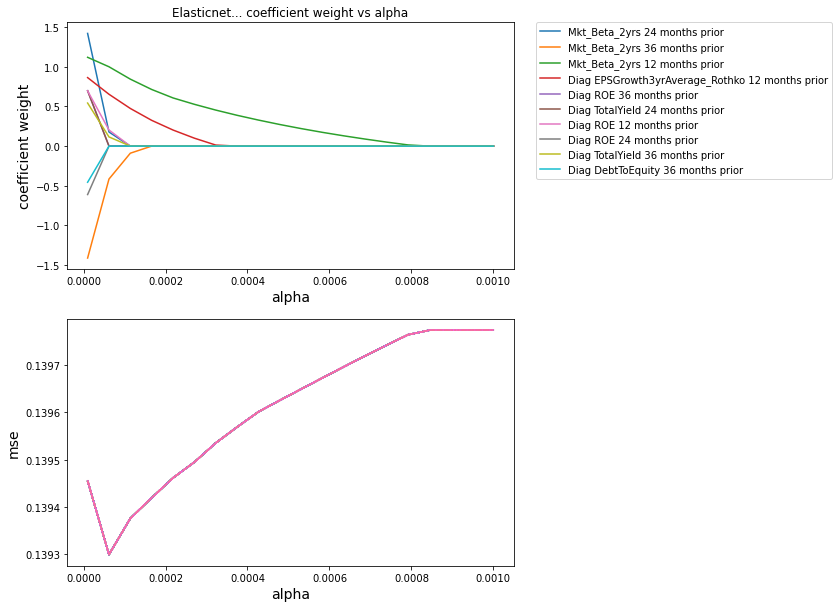

In [10]:
from sklearn.linear_model import ElasticNet

n = 20
alphas = np.linspace(0.00001,0.001, n) # generate n equally space points between 0.00001, and 0.001

coefficients = pd.DataFrame(index=X.columns) 
mse = pd.DataFrame(columns=X.columns)

for alpha in alphas:
    EN = ElasticNet(alpha=alpha)
    EN.fit(X_train, y_train)
    y_hat = EN.predict(X_test)
    
    # add a column alpha containing the weights of the coefficients of the model
    coefficients[alpha] = EN.coef_
    
    #save the MSE for this value of alpha....
    mse.loc[alpha] = mean_squared_error(y_hat, y_test)

# select the rows with the 10 largest absolutes value for the first value of alpha
coefficients = coefficients.loc[
    coefficients.abs().nlargest(10, coefficients.columns[0]).index, :
]

#Plot the relationship between alpha and coefficient weight
fig, ax = plt.subplots(2, 1, figsize=(8,10))
sns.lineplot(data=coefficients.T, dashes=False, ax=ax[0])
ax[0].set_title('Elasticnet... coefficient weight vs alpha')
ax[0].legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.) # place the legend outside of the plot
ax[0].set_xlabel("alpha", fontsize=14)
ax[0].set_ylabel("coefficient weight", fontsize=14);

# alpha and mse
sns.lineplot(data=mse, ax=ax[1])
ax[1].get_legend().remove()
ax[1].set_xlabel("alpha", fontsize=14)
ax[1].set_ylabel("mse", fontsize=14);

- In the above plot, we see that as $\alpha$ is increased the coefficients in the model tend to get smaller. 

Now let us look at how the ```l1_ratio``` affects the coefficients of the model. 

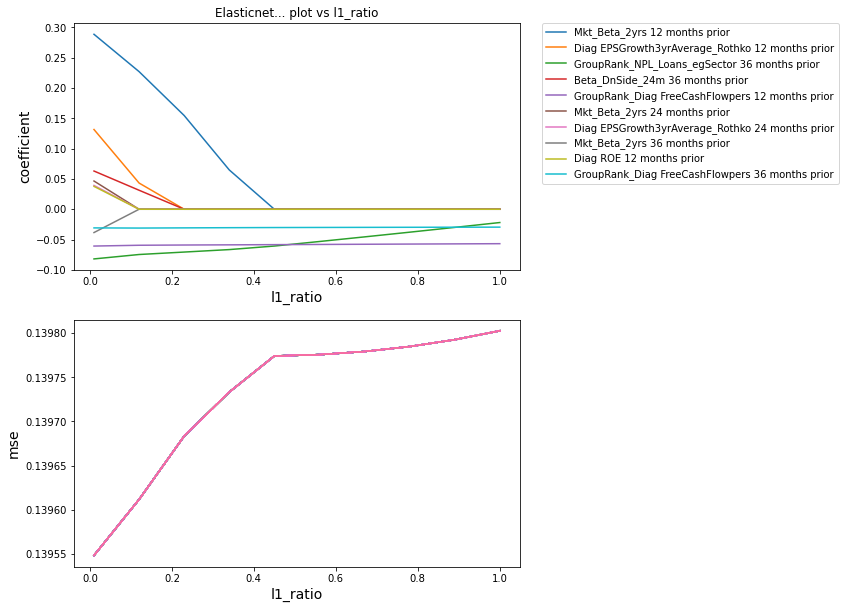

In [11]:
n = 10
l1_ratios = np.linspace(0.01, 1, n) # I did not include 0 since the model didn't converge in this case

coefficients = pd.DataFrame(index=X.columns)
mse = pd.DataFrame(columns=X.columns)
for l1_ratio in l1_ratios:
    EN = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    EN.fit(X_train, y_train)     
    y_hat = EN.predict(X_test)
    
    # add a row indexed alpha containing the coefficients of the model
    coefficients[l1_ratio] = EN.coef_    
     
    #save the MSE of this value of alpha....
    mse.loc[l1_ratio] = mean_squared_error(y_hat, y_test)  
    
# select the rows with the 10 largest absolutes value for the first value of alpha
coefficients = coefficients.loc[
    coefficients.abs().nlargest(10, coefficients.columns[0]).index, :
]

fig, ax = plt.subplots(2, 1, figsize=(8,10))
sns.lineplot(data=coefficients.T, dashes=False, ax=ax[0])
ax[0].set_title('Elasticnet... plot vs l1_ratio')
ax[0].legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.) # place the legend outside of the plot
ax[0].set_xlabel("l1_ratio", fontsize=14)
ax[0].set_ylabel("coefficient", fontsize=14);

#... alpha and mse
sns.lineplot(data=mse, dashes=False, ax=ax[1])
ax[1].get_legend().remove()
ax[1].set_xlabel("l1_ratio", fontsize=14)
ax[1].set_ylabel("mse", fontsize=14);

Now that we have seen how ```alpha``` and the ```l1_ratio``` affect the coefficients in the model, let us try and pick a good combination of hyperparameters to fit the data. To do this we will use grid search cross validation. This allows us to define a space of hyperparameters to try, evaluate the performance of the model with each combination of hyperparameters, and pick the best hyperparameters that fit the test set the best.

Hyperparameter search results. Alpha: 0.0001 ; L1_ratio= 0.1


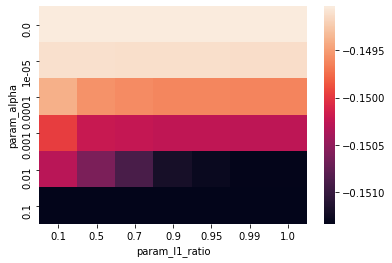

In [12]:
# **************************************
# **************************************
# LONG PROCESSING TIME!!
# **************************************
# **************************************

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = ElasticNet()

# Define the search we want to do on alpha and l1_ratio...
grid = {
    "alpha" : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0],
    'l1_ratio' : [.1, .5, .7, .9, .95, .99, 1]
}

# the cross validation we want to tune on...
cv = RepeatedKFold(
    n_splits=10, # number of subsets that the data is split into
    n_repeats=5  # number of times the data is randomly split into subsets
)

# Grid search... note that we pass an ElasticNet() function handle in, to then grid search alpha and l1_ratio, minimising the neg_mean_squared_error...
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, return_train_score=True)
res = search.fit(X_train, y_train)


# Plot the results from the grid search as a heat map
results = pd.DataFrame(search.cv_results_,
    columns=['param_alpha', 'param_l1_ratio', 'mean_train_score']
)
results = results.pivot(index='param_alpha', columns='param_l1_ratio', values='mean_train_score')
sns.heatmap(results);

print('Hyperparameter search results. Alpha:', search.best_estimator_.alpha, '; L1_ratio=', search.best_estimator_.l1_ratio)

Let us see how the best model performs on the test set.

In [13]:
mse = ((res.predict(X_test) - y_test) ** 2).mean() # mean squared error
print("MSE: ", mse)

MSE:  0.1393312460231726


# 3) Random forest

In this section, we will look at fitting a random forest to the data. Let us try and build some intuition behind what a random forest is and how it works. A random forest is an ensemble method that fits a number of decision trees to the data and makes an overall prediction based on the predictions of the individual decision trees. Let us fit one desicision tree to the data and see what it looks like.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree # for visualising the decision trees

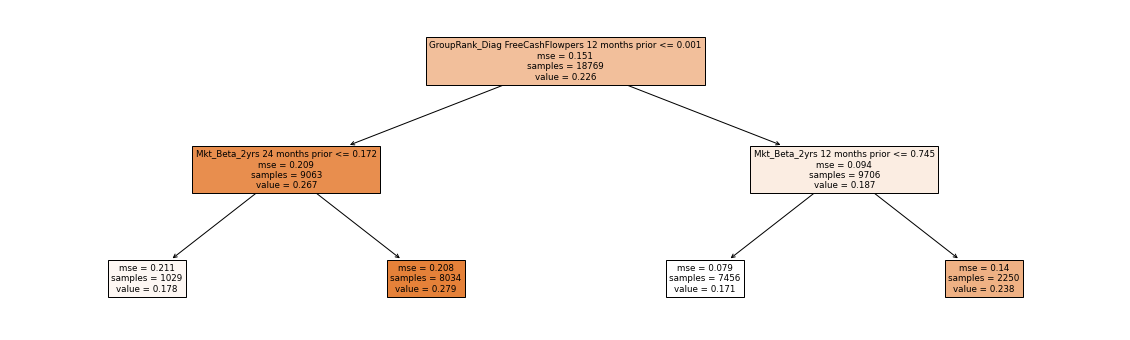

In [15]:
# good source of decision trees https://gdcoder.com/decision-tree-regressor-explained-in-depth/
rf = RandomForestRegressor(
    n_estimators = 1,  # limit the model to only 1 decision tree
    criterion = 'mse',
    max_depth = 2,     # limit the depth of the decision tree to 2
    bootstrap=False    # this ensure the decision tree uses the entire dataset
)

rf.fit(X_train, y_train)
trees = rf.estimators_ # a list of the decision trees

# plot the decision tree
fig, ax = plt.subplots(1, 1, figsize=(20,6))
tree.plot_tree(
    trees[0],
    feature_names = X.columns, # labels the feature that each node is making a decision on
    filled = True,
    ax=ax
);

The above diagram shows the decision tree in our model. Look at the top node. The labels can be interpreted as follows:

- ```GroupRank_Diag FreeCashFlowpers 12 months prior <= 0.001``` - This is the condition that is used in this note to split the data. Any samples for which this condition are true are sent to the left node and any samples for which this condition is false are sent to the right node.

- ```samples = 18769``` - The number of samples in the node. 
- ```value = 0.226``` - This is the prediction ($\hat{y}$) that is given to each sample in the node. 
- ```mse = 0.226``` - The mean squared error if all the samples in the node were given the value 0.226.

Note that the leaf nodes (the nodes at the bottom diagram) how not condition since no splitting of the data is done at this point. 

Now let us fit a bigger random forest to the data.

In [16]:
# **************************************
# **************************************
# SUPER LONG PROCESSING TIME!!
# **************************************
# **************************************

rf = RandomForestRegressor(criterion = 'mse')
rf.fit(X_train, y_train)
mse_test = mean_squared_error(y_test, rf.predict(X_test))
mse_train = mean_squared_error(y_train, rf.predict(X_train))

print("MSE test: ", mse_test)
print("MSE train: ", mse_train)

MSE test:  0.13365448639302246
MSE train:  0.020001020714919795


Now let us have a look at the structure of one of the decision trees.

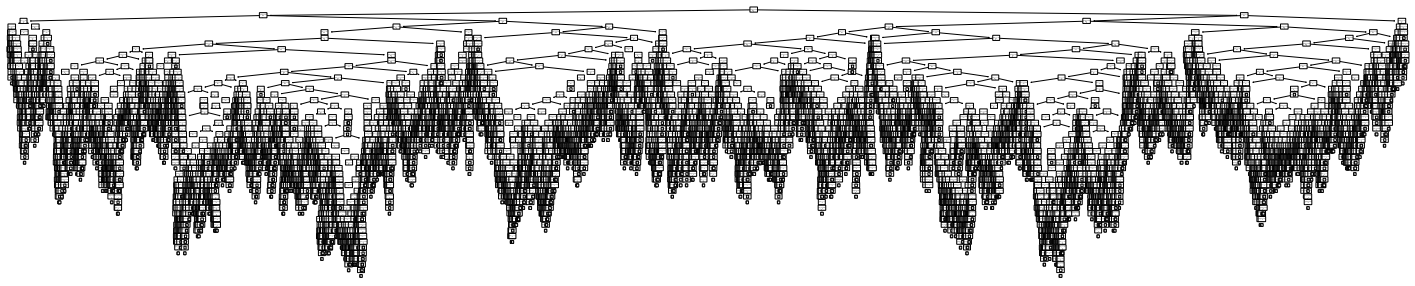

In [30]:
# **************************************
# **************************************
# SUPER LONG PROCESSING TIME!!
# **************************************
# **************************************

trees = rf.estimators_

fig, ax = plt.subplots(1, 1, figsize=(25,5))
tree.plot_tree(
    trees[0],
    #max_depth=4,
    #feature_names = X.columns, # labels the feature the each node is making a decision on
    rounded=True,
    impurity=False,
    label=None,
    ax=ax,
    precision=0
);

Just to reiterate this 1 of 100 decision trees in the random forest. They can get very complicated.

One of the main benefits of decision trees is they allow us to measure the importance of a feature in making predictions. For the entire random forest, we can calculate the mean feature importance across all the decision tree to get an idea of the important features across the entire random forest.

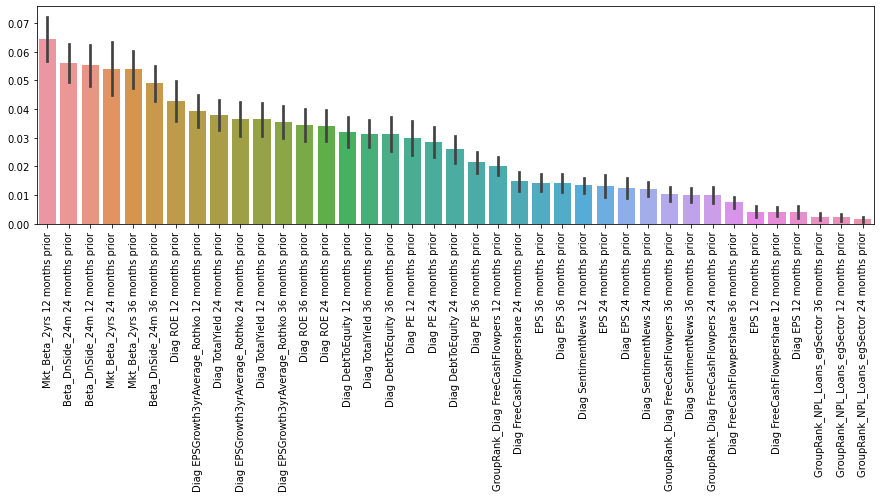

In [31]:
trees = rf.estimators_
feature_importances = pd.DataFrame(index = X.columns) # dataframe to store the feature importances

for i in range(len(trees)):
    col_name = "tree_" + str(i)
    feature_importances[col_name] = trees[i].feature_importances_

# now we find the mean feature importance for each feature
tree_names = feature_importances.columns
feature_importances['mean_feature_importance'] = feature_importances[tree_names].mean(axis=1)

feature_importances = feature_importances.sort_values(by=['mean_feature_importance'], ascending=False)

feature_importances = feature_importances.drop('mean_feature_importance', axis=1)

# plot the mean feature importances
fig, ax = plt.subplots(1,1,figsize=(15,4))
sns.barplot(
    data=feature_importances.T, 
    ax=ax,
    ci="sd" # include standard deviation error bars
)
# rotate the x-axis labels by 90 degrees
ax.set_xticklabels(rotation=90, labels=feature_importances.index);

# 4) Explainability

- A huge issue in artificial intelligence at the moment is explainability, known as XAI. 
- A lot of machine learning algorithms are classified as black box models. A black box model is a defined as a model that produces some output  𝑦  from some input  𝑥  without the user having knowledge of the internal workings of the model. 
- So, why should we trust a black box model if we don't know exactly why it behaves the way it does? This is a difficult question and in this section we will see two different approaches we can take to explain a black box model to make it easier to make sense of its behaviour.

## Local Interpretable Model-Agnostic Explanations (LIME)
- LIME is is an XAI approach
- We can try to explain why a given (local) outcome deviates from a target outcome.
- Let us suppose we have a model that produces some output  𝑦̂   for some input  𝑥 . Lime attempts to explain the output  𝑦̂   by peturbing the input  𝑥  slightly and attempts to predict how the model will respond to this perturbation. 
- So, LIME attempts to understand why the model behaves the way it does locally around  𝑥 . 
- Let us use lime to explain the random forest we trained.
- LIME's major draw back is that it is stochastic and can give a slightly different explaination on each run


In [17]:
import lime
import lime.lime_tabular

prediction:  0.3313731962934983
True value:  0.7132605163989139


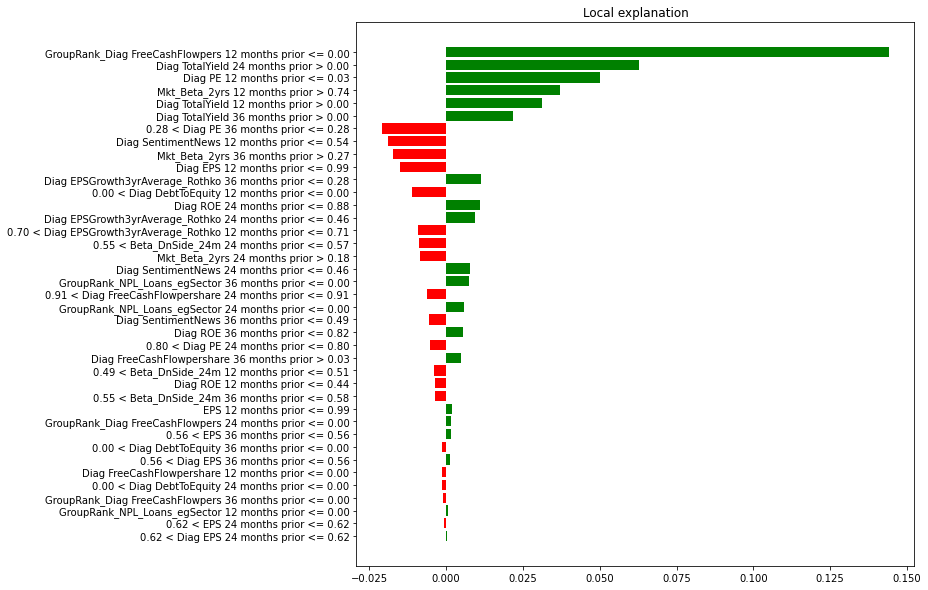

In [18]:
# create the lime explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, # training data must be a numpy array
    feature_names=X_train.columns, 
    mode='regression'
)

# print y_hat and the true value of the 100th test example
y_hat = rf.predict([X_test.values[100]])[0]
print("prediction: ", y_hat)
print("True value: ", y_test.iloc[100])


# explain the 10th test example.
exp = explainer.explain_instance(X_test.values[100],rf.predict, num_features=100)

fig = exp.as_pyplot_figure()
fig.set_size_inches(10, 10)

- Explain the 100th sample...
- See the true and predicted value of the 100-th sample in the test set. Notice that the prediction was lower than the true value. 

How to interpret the LIME plot...

- See an explanation of the deviation of our forecast from our target variable
- It explains the error...
- Listed on the left are the features in our data. 
- From top to bottom the features are ordered from most important to least important.
- Green/Red color: features that have positive correlations with the target are shown in green, otherwise red.
- ```Group_Rank_Diag FreeCashFlowpers 12 months prior``` <= 0.00 indicates low values of this feature positively correlate with the target 

Lets use lime to explain another test example.


prediction:  0.25185525208514103
True value:  0.3875490084782182


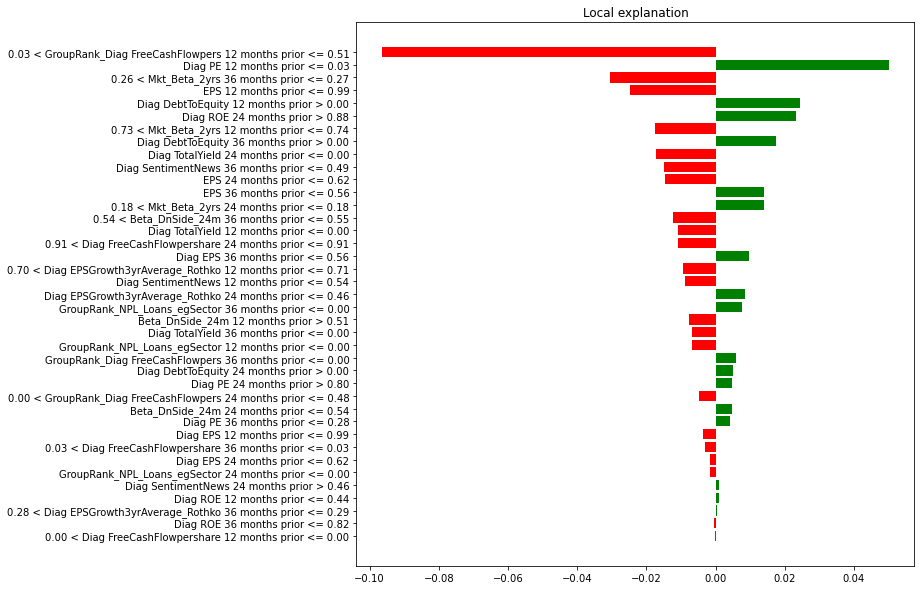

In [35]:
# print y_hat and the true value of the 15th test example
y_hat = rf.predict([X_test.values[15]])[0]
print("prediction: ", y_hat)
print("True value: ", y_test.iloc[15])

# explain the 10th test example.
exp = explainer.explain_instance(X_test.values[15],rf.predict, num_features=100)

fig = exp.as_pyplot_figure()
fig.set_size_inches(10, 10)

## SHapley Additive exPlanations (SHAP)
- SHAP is is another XAI approach
- We can try to explain why a given (local) outcome deviates from a target outcome.
- We consider each feature in a game theoretic context - as in Shapley values - to explaining a model outcomes. 
- One of the main advantages that Shap has over Lime is that it attempts to explain the model throughout the global feature space as opposed to locally around one sample (although shap can also be used to explain individual samples). 
- SHAP is also deterministic approach, which means the results it generates on the same sample are always the same. This is helpful!
- The main disadvantage of Shap however is that it can take an age to run. The runtime of Shap is dependent on the complexity of model so we will run it on a much simpler random forest.


In [19]:
from sklearn.ensemble import RandomForestRegressor

# limit the random forest to 20 decision trees with a maximum depth of 10
rf = RandomForestRegressor(criterion = 'mse', n_estimators = 20, max_depth=10)
rf.fit(X_train, y_train)
mse = mean_squared_error(y_test, rf.predict(X_test))
print("Test error: ", mse)

Test error:  0.13576483776205173


### Simple (but great)  feature importance

- A great feature of the sklearn implementation of randomforests is that it can generate it's own feature importance scores (and confidence intervals). 
- This is a great feature and can allow us to avoid out of the box XAI approaches (which in my experienece are never that great), and allow you to ru your own pertubations and sensitivity analysis....
- Now let take a quick look at the feature importances for this new model before we use SHAP.


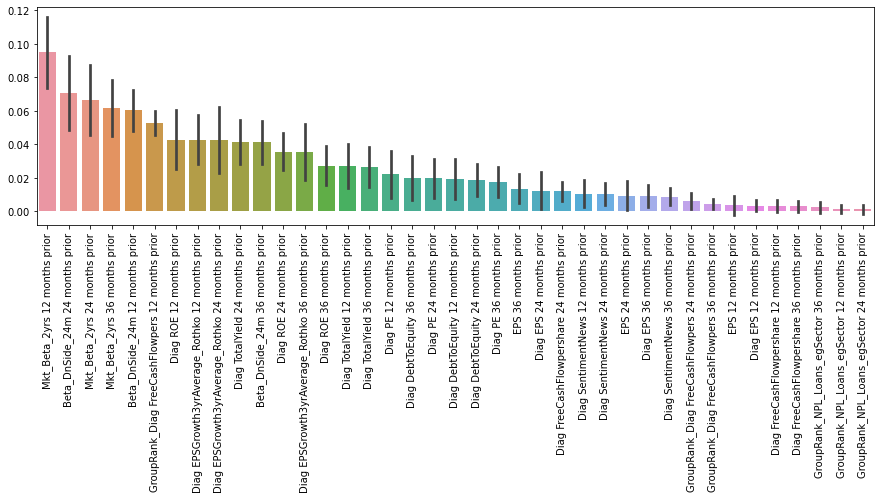

In [21]:
trees = rf.estimators_
feature_importances = pd.DataFrame(index = X.columns)

for i in range(len(trees)):
    col_name = "tree_" + str(i)
    feature_importances[col_name] = trees[i].feature_importances_

# now we find the mean feature importance for each feature
tree_names = feature_importances.columns
feature_importances['mean_feature_importance'] = feature_importances[tree_names].mean(axis=1)
feature_importances = feature_importances.sort_values(by=['mean_feature_importance'], ascending=False)
feature_importances = feature_importances.drop('mean_feature_importance', axis=1)

fig, ax = plt.subplots(1,1,figsize=(15,4))
sns.barplot(
    data=feature_importances.T, 
    ax=ax,
    ci="sd" # include standard deviation error bars
)
# rotate the x-axis labels by 90 degrees
ax.set_xticklabels(rotation=90, labels=feature_importances.index);

Now let us run Shap.

In [22]:
# **************************************
# **************************************
# SUPER LONG PROCESSING TIME!!
# **************************************
# **************************************

import shap

# create an explainer for the random forest model
explainer = shap.TreeExplainer(rf)

# calculate the shap values for X_test
shap_values = explainer.shap_values(X_test)

Now let us plot a summary plot.

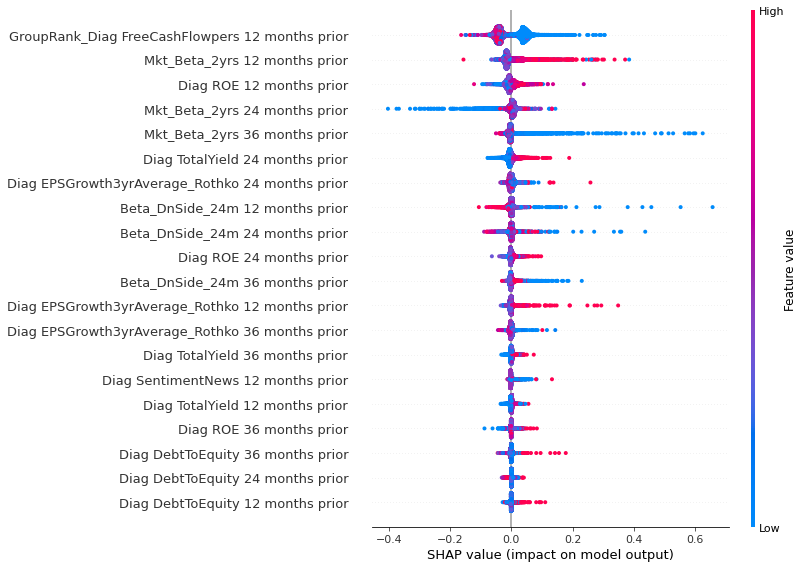

In [40]:
shap.summary_plot(shap_values, X_test)

### SHAP summary plots

- From top to bottom the features are ordered from most important to least important
- Shows the distribution of input variables by feature
- Red means a positive contribution made, blue dots mean a negative contribution made to the model outcome.
- For a return forecasting model, *blue dots are losing you money*!
- X-axis was have the SHAP value. 

Eg: Look at Diag TotalYield 24 months prior. The samples coloured red tend to have a positive shap value. This means that a high Diag TotalYield 24 months prior is assosciated with a positive SHAP value and therefore a higher average return.


Now let us take a look at decision plots which show us feature contributions to an outcome. To avoid the decision plot being too cluttered we just use the first 15 test.

Expected value of the model: [0.22584423]


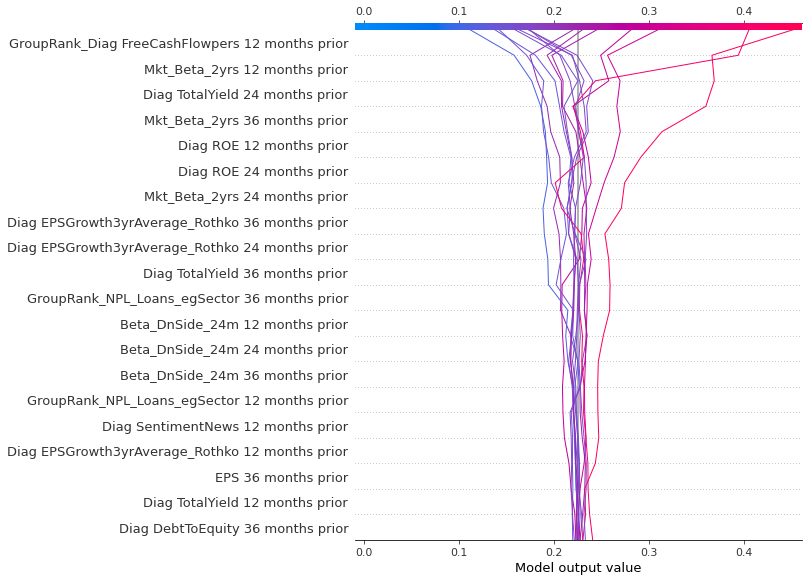

In [41]:
features = X_test.iloc[:15]
expected_value = explainer.expected_value
shap_values = explainer.shap_values(features)
print("Expected value of the model:", expected_value)
shap.decision_plot(expected_value, shap_values, features)

Descion plots can be interpreted as follows:

- Each line represents an individual instance in our dataset
- The line terminates at the top, at the value forecast by our learner (that SHAP is trying to explain)
- The path the line takes from the bottom to the top shows the push and the pull of different features 
- The most important features are at the top, the least important at the bottom
- Note how the lines are forced left and right. 
- A move left means the forecast is forced down (by the left hand feature)
- A move right means the forecast is forced up (by the left hand feature)

It is a superb visualisation. The numbers displayed give a good idea as to what is going on in the black box of the randomforest but it is uncertain whether SHAP's explaination would cut it in a life and death decision making situation. The punch line is that if you want a cursory understanding of a model SHAP is very powerful but if you want good and consistent, intuitive explanations from a mission critical model, bespoke development of XAI is essential...

# 5) Neural networks

In this section, we will implement a simple neural network in Pytorch to model our data. The network architeture we will use is shown below.

<img src="Images\nn.png" width="300"> 

On the left we have 12 input notes that will represent each of our 12 independent variables. We have 10 nodes in the hidden layer, and we have 1 out node in the output layer. In the ouput layer, we have one node which will give us the prediction for the dependent variable. 

We will implement our neural network using PyTorch. PyTorch is a fantastic deep learing library that is far too complicated to cover in this notebook. We will go through the essentials to get a neural network up and running. If the reader is interested in looking into PyTorch further I would recommend looking at the [official PyTorch tutorials](https://pytorch.org/tutorials/) to get started.

In [23]:
import torch # import pytorch

Our data has 39 features, so we will create a neural network with 51 input nodes, 10 hidden nodes, and 1 ouput node.

In [24]:
# We use the sequential function to 
model = torch.nn.Sequential(
    torch.nn.Linear(39, 10),   # input layer
    torch.nn.ReLU(),           # activation function for the input layer
    torch.nn.Linear(10, 1)    # Hidden layer
)

Now that we have defined our model we need to define a training loop for our model. To make things a little more clear, let us run through the fundamental components of the training loop that we will use:

1. Epochs. Training a neural can be broken down into epochs. An epoch is defined as a cycle through the entire training data. Since neural networks usually contain lots (tens of millions in some cases) of parameters, we have train them slowly using a very small learning rate. We therefore have to pass the training data through the network multiple times to give the network chance to learn the data. 

2. Loss function. A loss function is what we use to determine how well our model is performing. In our model we will use mean squared error which can be called in Pytorch using the ```torch.nn.MSELoss``` function. Pytorch also uses this loss function to calculate gradients that are used to update the parameters of the model.

3. Optimizer. An optimizer in Pytorch lets us define how we want the parameters in our model to be updated. In our model we will use stochastic gradient descent which can be called using the ```torch.optim.SGD()``` function. 

5. Calculating the training and test loss. After each epoch it is usually a good idea to see how the model performs on the entire training set and the test set. However there is a small hurdle we have to be aware doing this in Pytorch. Pytorch uses a very clever technique called [auto-differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) to automatically calculate the gradients used to update the weights in a model. This is computationally expensive and is not needed during testing since we do not want to update the parameters of the model during testing. We can briefly turn off Pytorch's auto-differentiation engine by using ```with torch.no_grad():``` which turns off auto-differentiation for any code in that block. This allows us to quickly test the performance of the model without performing any expensive auto-differentiation.

Now let us write our training loop.

In [25]:
# We must convert our data into pytorch tensors which are similar to numpy arrays.
X_train_tensor = torch.from_numpy(X_train.values).float()
y_train_tensor = torch.from_numpy(y_train.values).float()
X_test_tensor = torch.from_numpy(X_test.values).float()
y_test_tensor = torch.from_numpy(y_test.values).float()

# An optimiser is a method of updating the weights of the model after each step
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Define mean squared error as the loss function we are trying to minimize
loss_fn = torch.nn.MSELoss()
loss_train_hist = []
loss_test_hist = []

epochs = range(150)
for epoch in epochs:
    # set any accumulated gradients from the previous step to zero
    optimizer.zero_grad() 
    
    # make a prediction on the training set
    y_hat = model(X_train_tensor) 
    
    # calculate the mean squared error between the prediction and true value
    loss_train = loss_fn(y_hat, y_train_tensor)
    
    loss_train.backward()  # calculate the gradients dloss/dw where w is a parameter in the model
    optimizer.step() # update the parameters the gradient according to dloss/dw
    
    # calculate the MSE on the test set
    with torch.no_grad():
        y_hat = model(X_test_tensor)
        loss_test = loss_fn(y_hat, y_test_tensor)
        
    loss_train_hist.append(loss_train)
    loss_test_hist.append(loss_test)
        
    # print the loss every 25 epochs
    if (epoch % 5 == 0):
        print("Epoch %i  training error %f  test error %f" % (epoch, loss_train.item(), loss_test.item()))

Using a target size (torch.Size([18769])) that is different to the input size (torch.Size([18769, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
Using a target size (torch.Size([9245])) that is different to the input size (torch.Size([9245, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch 0  training error 0.159335  test error 0.146817
Epoch 5  training error 0.159106  test error 0.146612
Epoch 10  training error 0.158883  test error 0.146413
Epoch 15  training error 0.158667  test error 0.146221
Epoch 20  training error 0.158457  test error 0.146035
Epoch 25  training error 0.158254  test error 0.145855
Epoch 30  training error 0.158056  test error 0.145680
Epoch 35  training error 0.157864  test error 0.145511
Epoch 40  training error 0.157678  test error 0.145347
Epoch 45  training error 0.157497  test error 0.145188
Epoch 50  training error 0.157322  test error 0.145034
Epoch 55  training error 0.157152  test error 0.144884
Epoch 60  training error 0.156986  test error 0.144740
Epoch 65  training error 0.156826  test error 0.144600
Epoch 70  training error 0.156670  test error 0.144464
Epoch 75  training error 0.156519  test error 0.144333
Epoch 80  training error 0.156372  test error 0.144205
Epoch 85  training error 0.156229  test error 0.144082
Epoch 90  tr

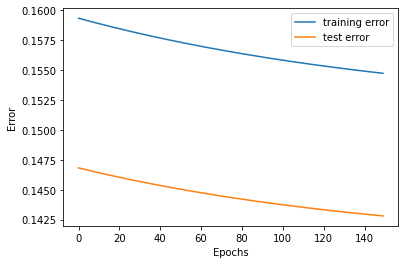

In [26]:
plt.plot(epochs, loss_train_hist, label = 'training error')
plt.plot(epochs, loss_test_hist, label = 'test error')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend();

Having run the neural network for 150 epochs, the best error we got from the neural network was still worse than what we got with the random forest. Judging from the training curves above, training the network for more epochs likely would reduce the test error but perhaps not enough to justify the training time. The poor results from the neural network are not all that surprising since they are notoriously bad at modelling tabular data.